<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/Secom_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries to be use**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
from tensorflow import keras
import numpy as np # linear algebra
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from keras.utils import to_categorical

# %tensorflow_version 1.x

# **Getting the data**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ludbaabdul","key":"c1d5593b1cc771121735ca6ee6e72f17"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paresh2047/uci-semcom

  0% 0.00/2.03M [00:00<?, ?B/s]
100% 2.03M/2.03M [00:00<00:00, 68.3MB/s]


In [5]:
# unzipping my data folder from my google drive
from zipfile import ZipFile
file_name = '/content/drive/My Drive/SS_Thesis/secom.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")


Done


In [6]:
Data = pd.read_csv('/content/uci-secom_v2.csv')

# displaying my data before selecting the features to be use
Data.head()


,Time,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,19/07/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,19/07/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,19/07/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,19/07/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,19/07/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
Data.isnull().any().any()

True

In [7]:
Data = Data.drop(['Time'], axis=1)
Data.loc[(Data['Pass/Fail'] == -1),'Pass/Fail'] = 0
Data.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


In [8]:
features = Data.drop(['Pass/Fail'],axis=1)
features_labels = Data['Pass/Fail']

In [7]:
features.shape

(1567, 449)

In [ ]:
# Scaler =StandardScaler()
# Data_sc =Scaler.fit_transform(Dataa)
# Data_sc

# # Create a PCA that will retain 99% of variance
# pca = PCA(n_components=0.99, whiten=True)
# # Conduct PCA
# features_pca = pca.fit_transform(Data_sc)
# # Show results
# print("Original number of features:", Data_sc.shape[1])
# print("Reduced number of features:", features_pca.shape[1])

In [ ]:
# indices_to_remove = []
# zero_counter=0
# for i in range(Data_sc.shape[0]):
#     if Dataa_labels[i] == 0:
#         zero_counter += 1
#         if zero_counter > 104:
#             indices_to_remove.append(i)

# np.shape(indices_to_remove)

(1359,)

In [ ]:
# labels=np.array(Dataa_labels)
# Data_rd= np.delete(Data_sc,indices_to_remove, axis=0)
# Data_label_rd = np.delete(labels,indices_to_remove, axis=0)
# np.shape(Data_label_rd)

(208,)

In [ ]:
# Data_rd

# **Data Visualisation**

0    1463
1     104
Name: Pass/Fail, dtype: int64


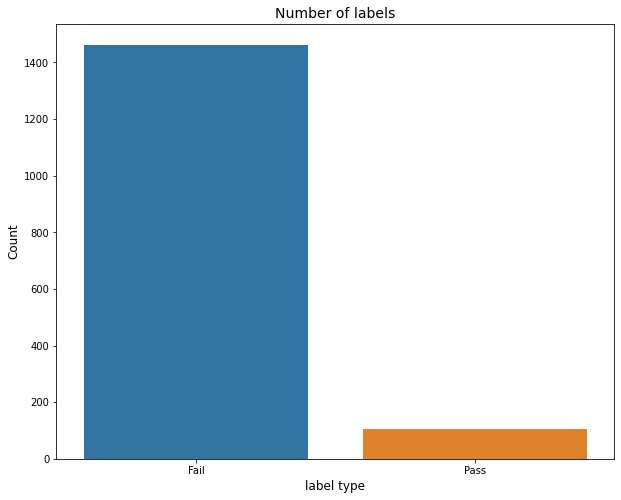

In [9]:
# Get the counts for each class
alabel_count = Data['Pass/Fail'].value_counts()
print(alabel_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=alabel_count.index, y= alabel_count.values)
plt.title('Number of labels', fontsize=14)
plt.xlabel('label type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(alabel_count.index)), ['Fail', 'Pass'])
plt.show()

# **Preprocessing the Data**

In [ ]:
# # creating initial dataframe
# labels = ('DoS', 'Reconnaissance','DDoS')
# train_labels = pd.DataFrame(train_labels, columns=['labels'])
# test_labels = pd.DataFrame(labels, columns=['labels'])

# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# train_labels['labels_Cat'] = labelencoder.fit_transform(train_labels['labels'])
# test_labels['labels_Cat'] = labelencoder.fit_transform(train_labels['labels'])
# train_labels



# # creating instance of labelencoder
# label_encoder = LabelEncoder()
# train_labels = label_encoder.fit_transform(train_labels.astype('str')) 
# test_labels = label_encoder.transform(test_labels.astype('str'))
# valid_labels = label_encoder.transform(valid_labels.astype('str'))

# # converting the training and testing labels to categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
# valid_labels = to_categorical(valid_labels)

# # printing the training labels
# valid_labels

In [ ]:
# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train_data = sc.fit_transform(train_data)
# test_data = sc.transform(test_data)
# valid_data = sc.transform(valid_data)

# valid_data

In [10]:
# finding missing and categorical values


col_missing_values = [col for col in features.columns
                     if features[col].isnull().any() and features[col].dtype]

# col wit numerical values which is null in this project
col_numerical_values = [col for col in features.columns if features[col].dtype in ['int64', 'float64']]

# col with categorical values
col_categorical_values = [col for col in features.columns 
                         if features[col].dtype == 'object']

#missing values cout per col
missing_val_count_by_column = (features.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(col_categorical_values)
print(col_numerical_values)
  



0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 399, dtype: int64
[]
['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '50', '51', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '71', '72', '73', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '112', '113', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '142', '143', '144', '145', '146', '147', '148', '150', '151', '

In [11]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
imputer = SimpleImputer() # Your code here
imputed_features = pd.DataFrame(imputer.fit_transform(features))

# Fill in the lines below: imputation removed column names; put them back
imputed_features.columns = features.columns

features = imputed_features

In [10]:
features.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,262.729683,0.679641,6.444985,0.14561,2.61087,0.060086,2.452417,21.117674,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.021615,0.016829,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,262.729683,0.679641,6.444985,0.14561,2.61087,0.060086,2.452417,21.117674,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.009600,0.020100,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064000,0.903200,1.100000,0.62190,0.41220,0.256200,0.411900,68.848900,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.058400,0.048400,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228000,0.651100,7.320000,0.16300,3.56110,0.067000,2.729000,25.036300,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.020200,0.014900,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,262.729683,0.679641,6.444985,0.14561,2.61087,0.060086,2.452417,21.117674,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.021615,0.016829,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


In [12]:
features.isnull().any().any()

False

In [ ]:
features.to_csv('features.csv')
features_labels.to_csv('features_labels.csv')

In [14]:
Scaler =StandardScaler()
features =Scaler.fit_transform(features)

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
features = pca.fit_transform(features)
# Show results
print("Original number of features:", Data.shape[1])
print("Reduced number of features:", features.shape[1])

Original number of features: 450
Reduced number of features: 219


In [15]:
features.shape

(1567, 219)

In [ ]:
features

array([[-0.32858361,  0.69647287,  1.04053561, ...,  0.3770477 ,
        -1.19647053,  1.62105746],
       [-0.44189751,  0.19482214,  0.7732014 , ...,  0.45545517,
         1.49545997,  0.51980353],
       [ 0.10986041,  0.26869328,  0.30861246, ..., -2.78873282,
        -0.9591722 , -0.49221974],
       ...,
       [-0.24165636, -0.35540788, -0.317958  , ..., -0.26388081,
         0.63922444,  0.2322118 ],
       [-0.24049561, -0.75259877, -0.93117312, ...,  1.04883222,
        -1.05125991, -0.26250875],
       [ 0.41438199, -0.69209249, -0.65081572, ..., -0.47947677,
         0.20159165, -1.12758454]])

In [ ]:
# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train_data = sc.fit_transform(train_data)
# test_data = sc.transform(test_data)
# valid_data = sc.transform(valid_data)

# valid_data

# **Model Evaluation**

In [16]:
def get_Evaluation_matrics(preds, orig_test_labels):

  # Get the confusion matrix
  cm  = confusion_matrix(orig_test_labels, preds)
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
  plt.xticks(range(2), ['Fail', 'Pass'], fontsize=16)
  plt.yticks(range(2), ['Fail', 'Pass'], fontsize=16)
  plt.show()

  # Calculate Precision and Recall
  tn, fp, fn, tp = cm.ravel()
  Accuracy = (tp+tn)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  F1_score = 2*tp/(2*tp+fp+fn)

  print("Accuracy of the model is {:.2f}".format(Accuracy))
  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("specificity of the model is {:.2f}".format(specificity))
  print("F1_score of the model is {:.2f}".format(F1_score))



# **Model Prediction**

In [17]:
def get_Model_prediction(model, test_data, test_labels):
  import numpy as np

  # # Evaluation on test dataset
  # test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=32)
  # print("Loss on test set: ", test_loss)
  # print("Accuracy on test set: ", test_score)
  
  preds = model.predict(test_data, batch_size=16)
  preds = np.argmax(preds, axis=-1)

  # orig_test_labels = np.argmax(test_labels, axis=-1)

  print(test_labels)
  print(preds)

  return preds, test_labels

# **Model ROC and AUC value**

In [18]:
def get_model_ROC_AUC_curve(model_pred, test_labels, label=None):
    import numpy as np

    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(test_labels, model_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

    auc_score = auc(fpr, tpr)
    print('AUC Score : ', auc_score)

# **Plotting Model Loss**

In [19]:
def plot_Model_loss(History, epoch):
  history_dict2 = History.history
  loss_values2 = history_dict2['loss']
  val_loss_values2 = history_dict2['val_loss']

  epochs = range(1, epoch + 1)
  plt.plot(epochs, loss_values2, 'b-', label='training loos')
  plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
  plt.title('trainin/validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Plotting Model Accuracy**

In [20]:
def plot_Model_Accuracy(History, epoch):
  history_dict2 = History.history
  acc_values2 = history_dict2['accuracy']
  val_acc_values2 = history_dict2['val_accuracy']

  epochs = range(1, epoch + 1)
  plt.plot(epochs, acc_values2, 'b-', label='training Accuracy')
  plt.plot(epochs, val_acc_values2, 'r-', label='validation Accuracy')
  plt.title('trainin/validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Model Building**

# **ANN**

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, train_size = 0.85, random_state = 123)

train_data = np.array(train_data)
valid_data = np.array(valid_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)

y.iloc[:,0].value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    1463
0    1463
Name: 0, dtype: int64

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE


model = models.Sequential()
model.add(layers.Dense(1024, input_shape = (219,), activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(train_data,
                          train_labels,
                          epochs=30,
                          batch_size=16,
                          validation_data=(valid_data, valid_labels),
                          callbacks=[early_stopping_cb]
                          )


Epoch 1/30
125/125 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.4771 - val_loss: 0.6932 - val_accuracy: 0.5128
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5214 - val_loss: 0.6932 - val_accuracy: 0.4929
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5239 - val_loss: 0.6932 - val_accuracy: 0.5356
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5365 - val_loss: 0.6932 - val_accuracy: 0.5328
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5334 - val_loss: 0.6932 - val_accuracy: 0.5242
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5249 - val_loss: 0.6932 - val_accuracy: 0.5242
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5279 - val_loss: 0.6932 - val_accuracy: 0.5157
Epoch 

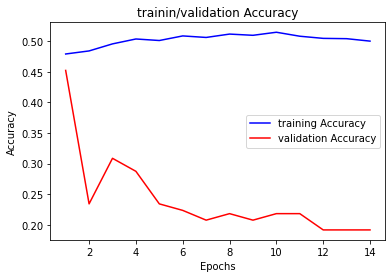

In [ ]:
# plotting the the training accuracy
plot_Model_Accuracy(model_history, 14)

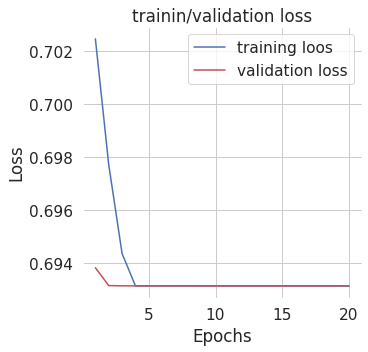

In [ ]:
# plotting the the training loss
plot_Model_loss(model_history, 20)

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]


<Figure size 432x288 with 0 Axes>

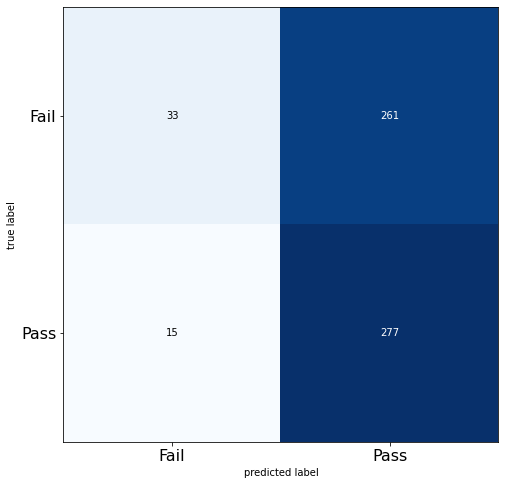

Accuracy of the model is 0.53
Recall of the model is 0.95
Precision of the model is 0.51
specificity of the model is 0.11
F1_score of the model is 0.67


In [ ]:
# Evaluating my model using CM, precsion, and recal
preds, original_test_labels = get_Model_prediction(model, test_data, test_labels)
get_Evaluation_matrics(preds, original_test_labels)

AUC Score :  0.5304375174727426


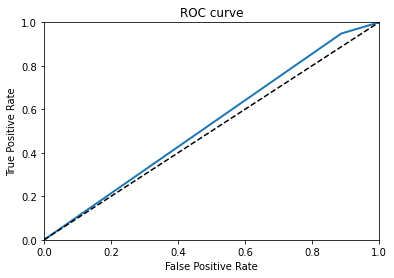

In [ ]:
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

# **XG Boost**# 

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

XG_model = XGBClassifier()

XG_model.fit(train_data, train_labels)

XG_preds = XG_model.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

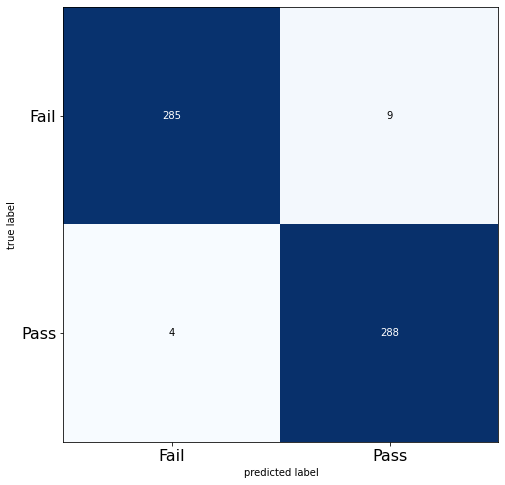

Accuracy of the model is 0.98
Recall of the model is 0.99
Precision of the model is 0.97
specificity of the model is 0.97
F1_score of the model is 0.98


In [22]:
get_Evaluation_matrics(XG_preds, test_labels)

AUC Score :  0.9778445624825272


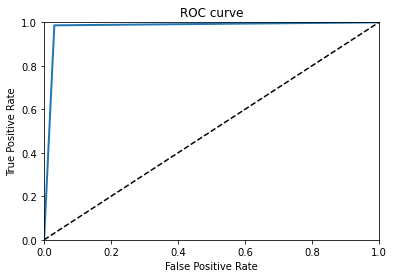

In [23]:
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(XG_preds, test_labels)

**LR**

In [25]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LogisticRegression()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

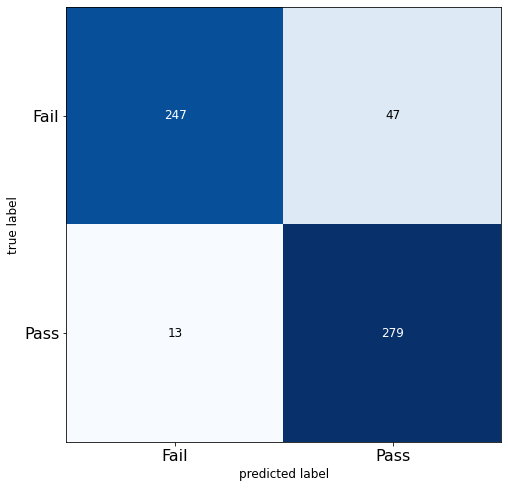

Accuracy of the model is 0.90
Recall of the model is 0.96
Precision of the model is 0.86
specificity of the model is 0.84
F1_score of the model is 0.90


In [37]:
get_Evaluation_matrics(preds, test_labels)

AUC Score :  0.9063810455689125


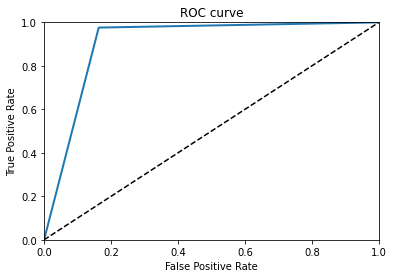

In [26]:
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier as knn
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = knn(leaf_size=10)

model.fit(train_data, train_labels)

preds = model.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

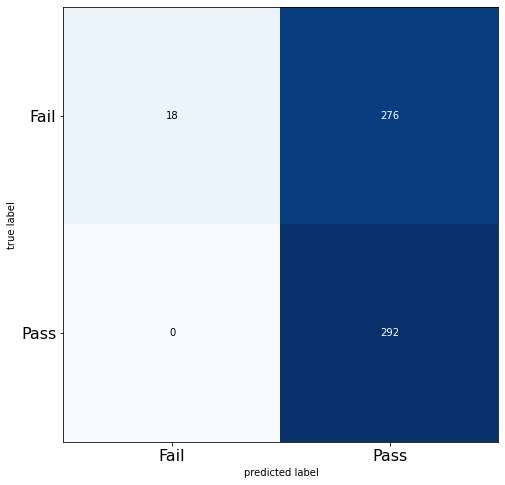

Accuracy of the model is 0.53
Recall of the model is 1.00
Precision of the model is 0.51
specificity of the model is 0.06
F1_score of the model is 0.68


In [46]:
get_Evaluation_matrics(preds, test_labels)

AUC Score :  0.5306122448979591


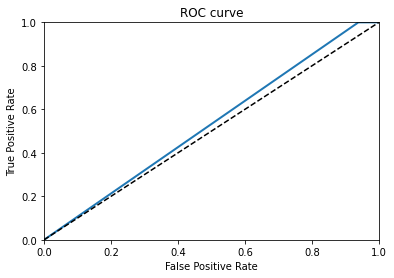

In [47]:
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

# **K_Fold**

In [30]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Create standardizer
standardizer = StandardScaler()
# Create logistic regression object
logit = SVC()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=7, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, # Pipeline
                              features, # Feature matrix
                              features_labels, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="precision", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
cv_results.mean()

0.9965850945600546

# **K_Fold With SMOTE**

In [31]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
features, features_labels = oversample.fit_resample(features, features_labels)

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = SVC()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=7, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, # Pipeline
                              features, # Feature matrix
                              features_labels, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="precision", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
cv_results.mean()

0.9965850945600546

# **CM for K_fold With SMOTE**

In [49]:
!pip install museotoolbox

     |████████████████████████████████| 1.8MB 4.8MB/s 
  Created wheel for museotoolbox: filename=museotoolbox-0.13.6-cp36-none-any.whl size=1812020 sha256=1c7bb9148e8c34c81623c0d24d839967e6456e96d206b93da280b3620c620cd7
  Stored in directory: /root/.cache/pip/wheels/f0/56/fb/a5ecb3494188343c3e4f025e03dc5afdb0befa767f7f9db4b8
Successfully built museotoolbox


**SVC**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([[438,   3],
       [ 49, 484]], dtype=int16)

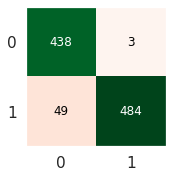

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

oversample = SMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = SVC()

conf_matrix_list_of_arrays = []
kf = KFold(3, shuffle=False, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 438
tn = 484
fp = 3
fn = 49

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.2f}".format(Accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("specificity of the model is {:.2f}".format(specificity))
print("F1_score of the model is {:.2f}".format(F1_score))
print("")

Accuracy of the model is 0.95
Recall of the model is 0.90
Precision of the model is 0.99
specificity of the model is 0.99
F1_score of the model is 0.94



**XGBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([[101,   1],
       [ 11, 110]], dtype=int16)

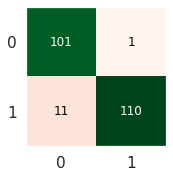

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

oversample = SMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = XGBClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(13, shuffle=False, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 101
tn = 110
fp = 1
fn = 11

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.2f}".format(Accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("specificity of the model is {:.2f}".format(specificity))
print("F1_score of the model is {:.2f}".format(F1_score))
print("")

Accuracy of the model is 0.95
Recall of the model is 0.90
Precision of the model is 0.99
specificity of the model is 0.99
F1_score of the model is 0.94



**RF**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([[207,   5],
       [  1, 203]], dtype=int16)

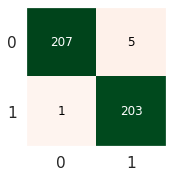

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

oversample = SMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = RandomForestClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=False, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 207
tn = 203
fp = 5
fn = 1

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.2f}".format(Accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("specificity of the model is {:.2f}".format(specificity))
print("F1_score of the model is {:.2f}".format(F1_score))
print("")

Accuracy of the model is 0.99
Recall of the model is 1.00
Precision of the model is 0.98
specificity of the model is 0.98
F1_score of the model is 0.99



**LR**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([[240,  45],
       [247, 442]], dtype=int16)

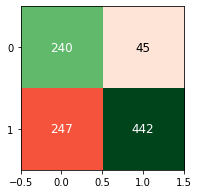

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

oversample = SMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LogisticRegression()

conf_matrix_list_of_arrays = []
kf = KFold(3, shuffle=False, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [35]:
tp = 240
tn = 442
fp = 45
fn = 247

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.2f}".format(Accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("specificity of the model is {:.2f}".format(specificity))
print("F1_score of the model is {:.2f}".format(F1_score))
print("")

Accuracy of the model is 0.70
Recall of the model is 0.49
Precision of the model is 0.84
specificity of the model is 0.91
F1_score of the model is 0.62



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([[184, 182],
       [546, 365]], dtype=int16)

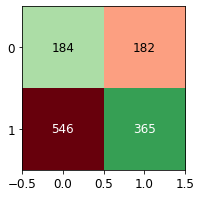

In [54]:
from sklearn.neighbors import KNeighborsClassifier as knn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

oversample = SMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = knn()

conf_matrix_list_of_arrays = []
kf = KFold(4, shuffle=False, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [53]:
tp = 80
tn = 97
fp = 78
fn = 173

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.2f}".format(Accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("specificity of the model is {:.2f}".format(specificity))
print("F1_score of the model is {:.2f}".format(F1_score))
print("")

Accuracy of the model is 0.41
Recall of the model is 0.32
Precision of the model is 0.51
specificity of the model is 0.55
F1_score of the model is 0.39

